In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
data=pd.read_csv("/Users/somnathrana/Desktop/ani/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
data.shape

(768, 9)

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
pd.isnull(data).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df_cp = data.copy()
df_cp['Glucose']=data['Glucose'].replace(0, data['Glucose'].median())
df_cp['BloodPressure']=data['BloodPressure'].replace(0, data['BloodPressure'].median())
df_cp['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].median())
df_cp['Insulin'] = data['Insulin'].replace(0, data['Insulin'].median())
df_cp['BMI'] = data['BMI'].replace(0, data['BMI'].median())

In [17]:
df_cp.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
df_cp.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

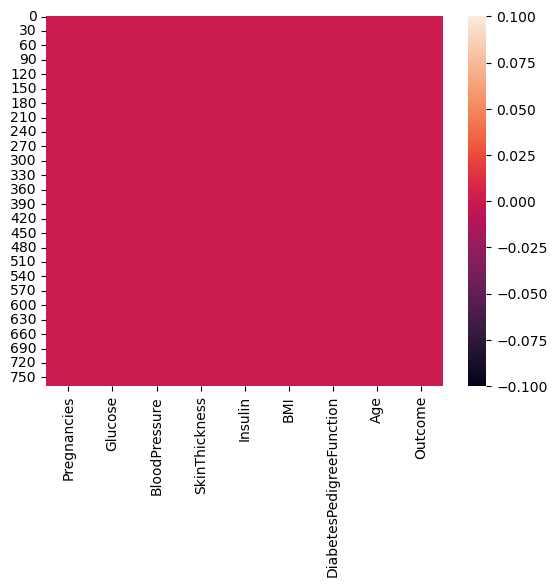

In [19]:
sns.heatmap(df_cp.isnull())

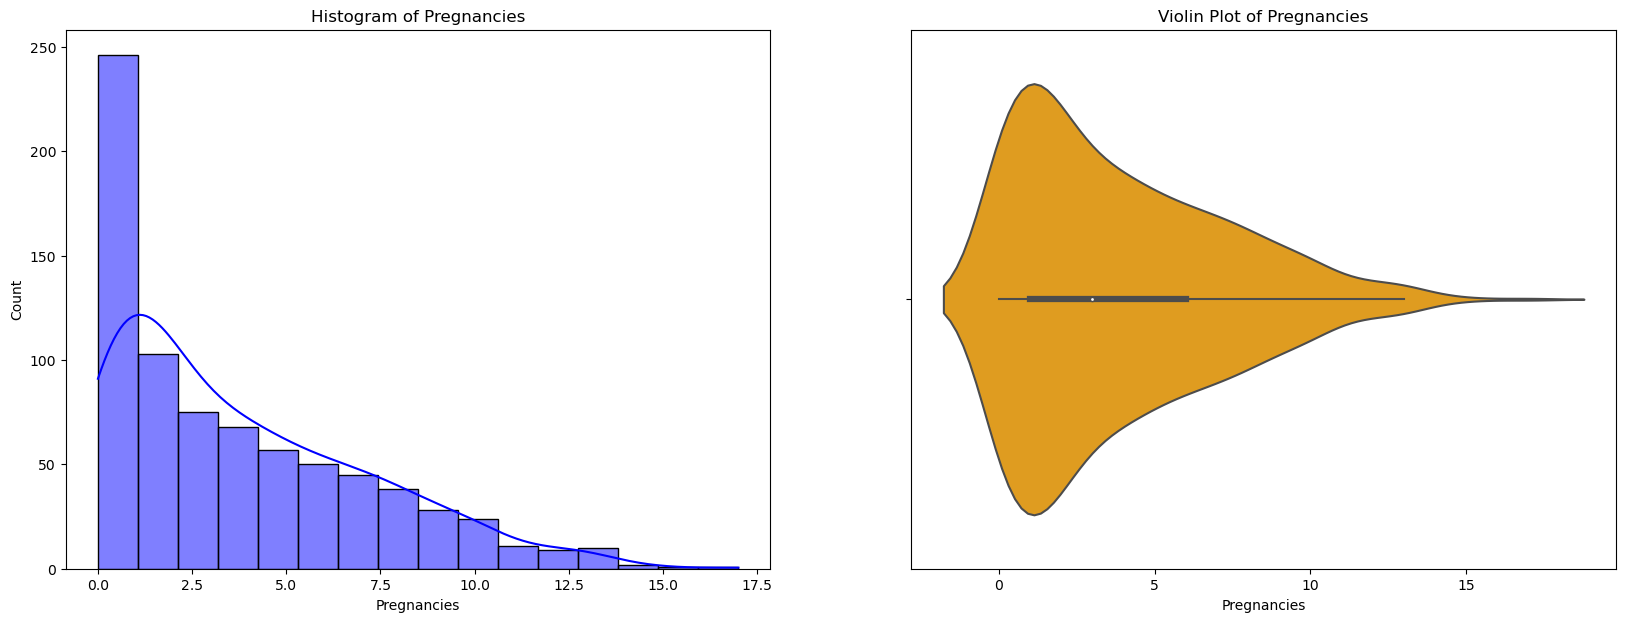

In [20]:
#Pregnancies
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df_cp, x="Pregnancies", kde=True, ax=ax1[0], color='blue')
ax1[0].set_title('Histogram of Pregnancies')
sns.violinplot(data=df_cp, x="Pregnancies", ax=ax1[1], color='orange')
ax1[1].set_title('Violin Plot of Pregnancies')
plt.show()

In [21]:
df_cp["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [22]:
print("Median of Pregnancies: ",df_cp['Pregnancies'].median())
print("Maximum of Pregnancies: ",df_cp['Pregnancies'].max())
print("Mean of Pregnancies: ",df_cp['Pregnancies'].mean())

Median of Pregnancies:  3.0
Maximum of Pregnancies:  17
Mean of Pregnancies:  3.8450520833333335


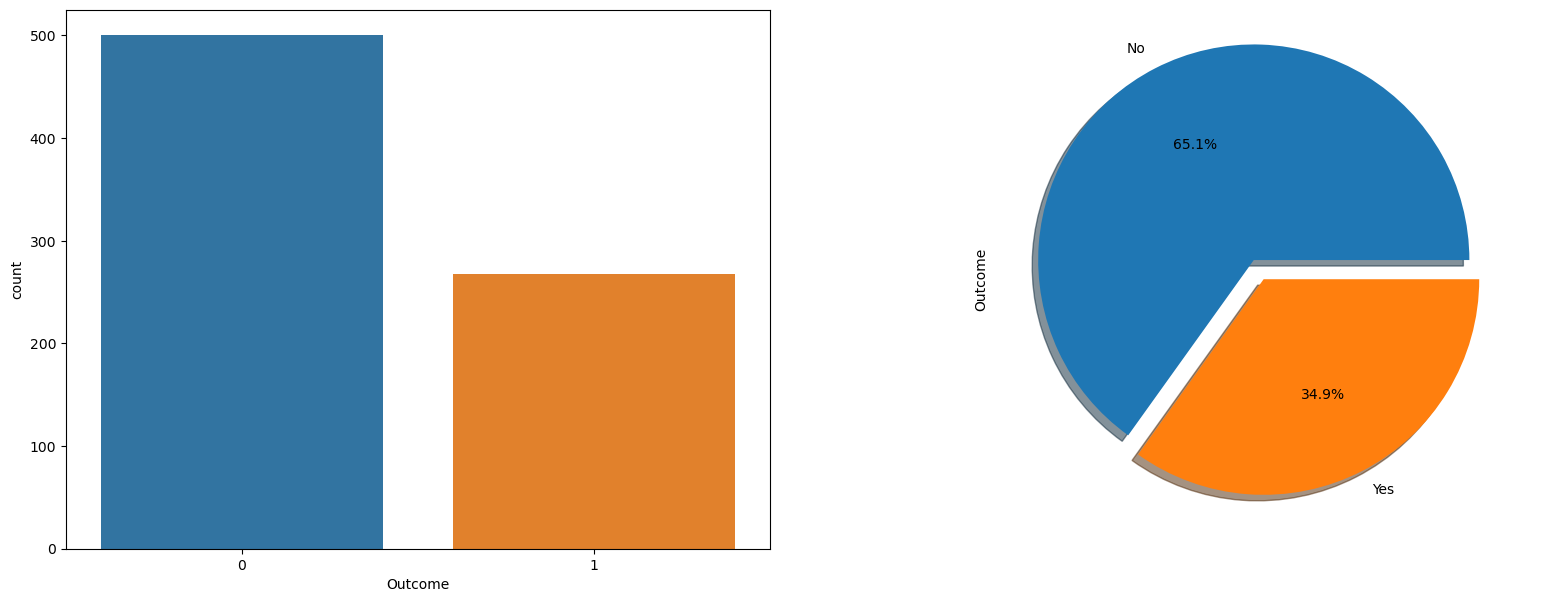

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
sns.countplot(data=df_cp, x="Outcome", ax=ax[0])
data["Outcome"].value_counts().plot.pie(explode=[0.1, 0], autopct="%1.1f%%", labels=["No", "Yes"], shadow=True, ax=ax[1])
plt.show()

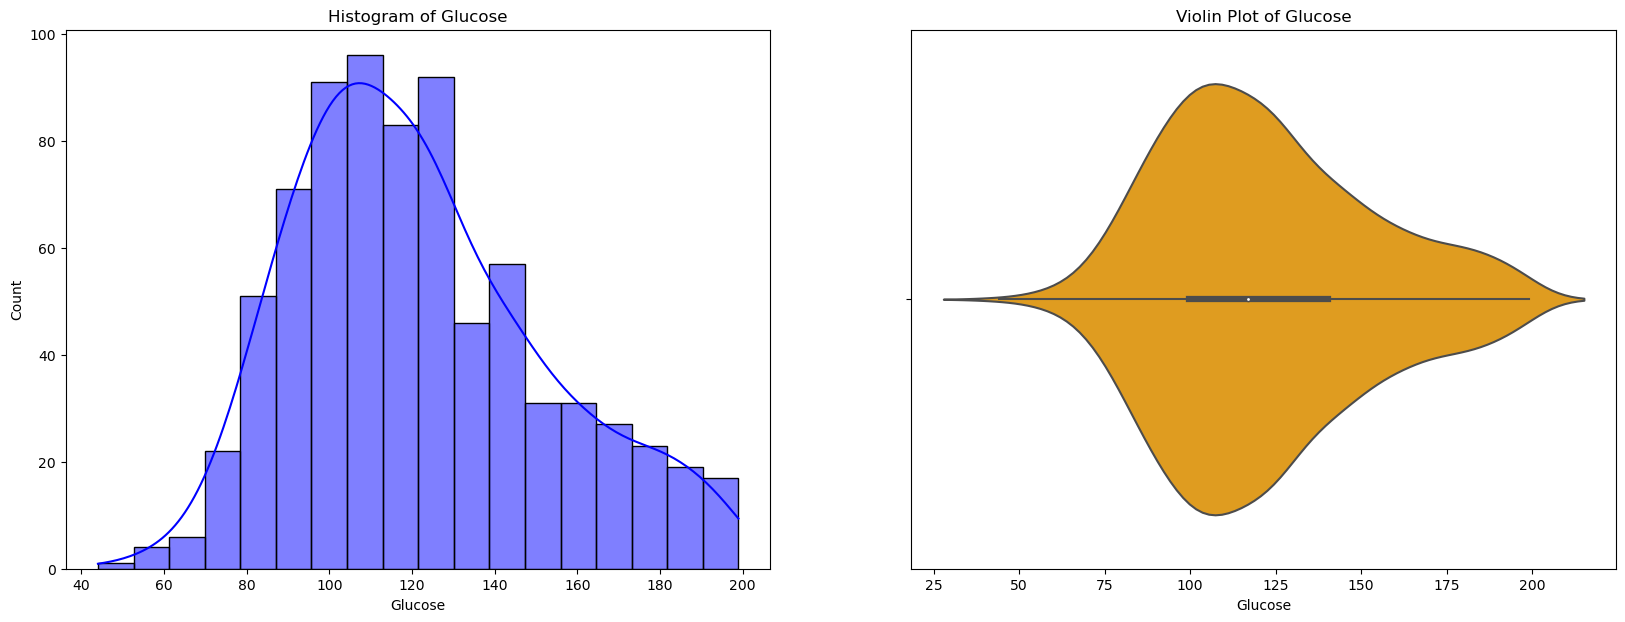

In [25]:
#Glucose
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df_cp, x="Glucose", kde=True, ax=ax1[0], color='blue')
ax1[0].set_title('Histogram of Glucose')
sns.violinplot(data=df_cp, x="Glucose", ax=ax1[1], color='orange')
ax1[1].set_title('Violin Plot of Glucose')
plt.show()

In [26]:
print("Median of Glucose: ",df_cp['Glucose'].median())
print("Maximum of Glucose: ",df_cp['Glucose'].max())
print("Mean of Glucose: ",df_cp['Glucose'].mean())

Median of Glucose:  117.0
Maximum of Glucose:  199
Mean of Glucose:  121.65625


In [27]:
print("Rows with Glucose value of 0: ",df_cp[df_cp["Glucose"]==0].shape[0])

Rows with Glucose value of 0:  0


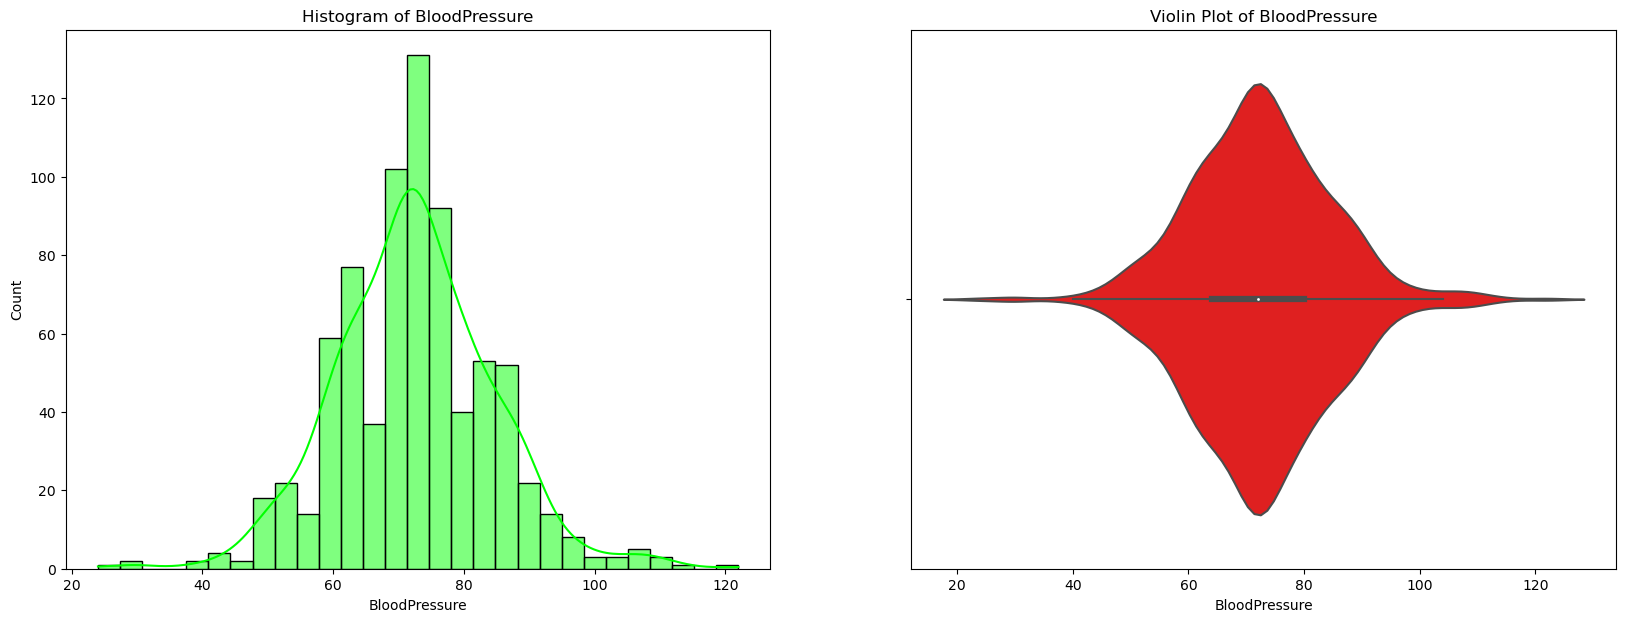

In [28]:
#BloodPressure
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df_cp, x="BloodPressure", kde=True, ax=ax1[0], color='lime')
ax1[0].set_title('Histogram of BloodPressure')
sns.violinplot(data=df_cp, x="BloodPressure", ax=ax1[1], color='red')
ax1[1].set_title('Violin Plot of BloodPressure')
plt.show()

In [29]:
print("Median of BloodPressure: ",df_cp['BloodPressure'].median())
print("Maximum of BloodPressure: ",df_cp['BloodPressure'].max())
print("Mean of BloodPressure: ",df_cp['BloodPressure'].mean())

Median of BloodPressure:  72.0
Maximum of BloodPressure:  122
Mean of BloodPressure:  72.38671875


In [30]:
print("Rows with BloodPressure value of 0: ",df_cp[df_cp["BloodPressure"]==0].shape[0])

Rows with BloodPressure value of 0:  0


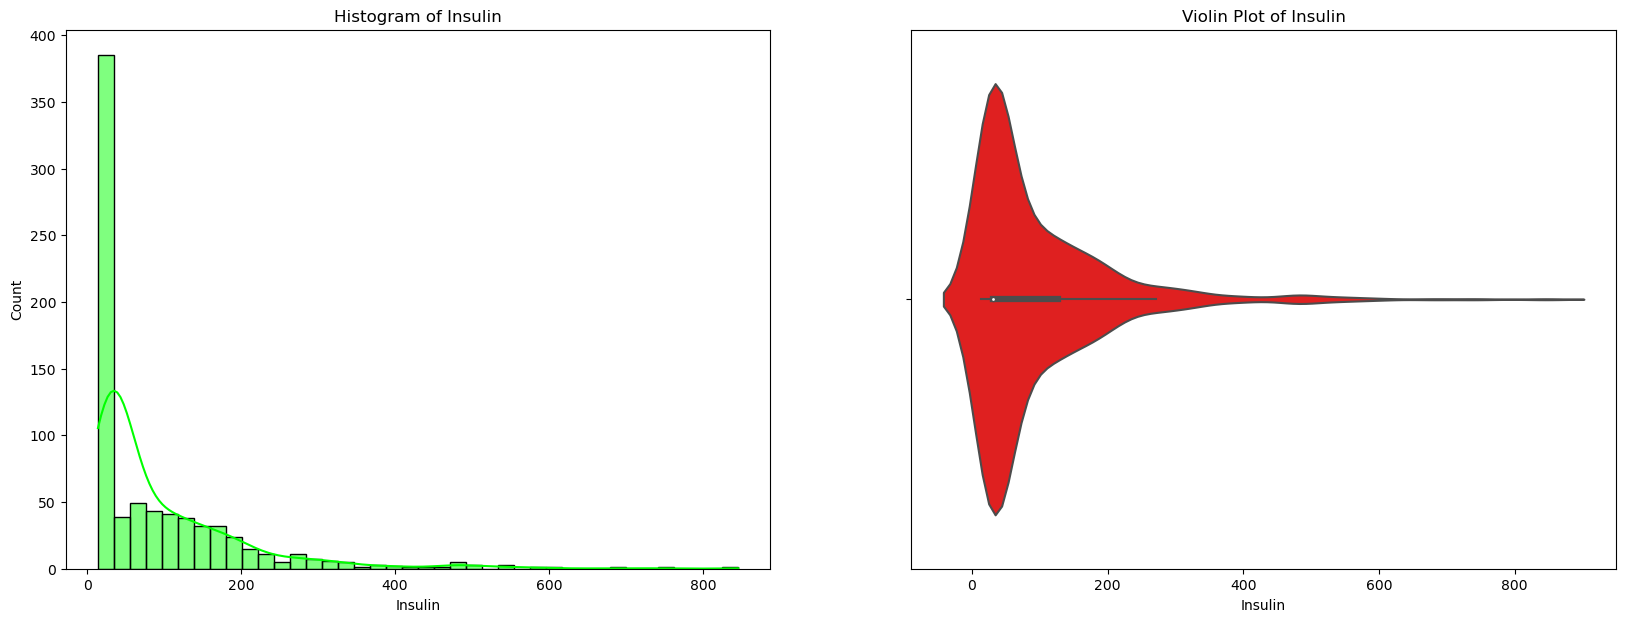

In [31]:
#Insulin
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df_cp, x="Insulin", kde=True, ax=ax1[0], color='lime')
ax1[0].set_title('Histogram of Insulin')
sns.violinplot(data=df_cp, x="Insulin", ax=ax1[1], color='red')
ax1[1].set_title('Violin Plot of Insulin')
plt.show()

In [32]:
print("Median of Insulin: ",df_cp['Insulin'].median())
print("Maximum of Insulin: ",df_cp['Insulin'].max())
print("Mean of Insulin: ",df_cp['Insulin'].mean())

Median of Insulin:  31.25
Maximum of Insulin:  846.0
Mean of Insulin:  94.65234375


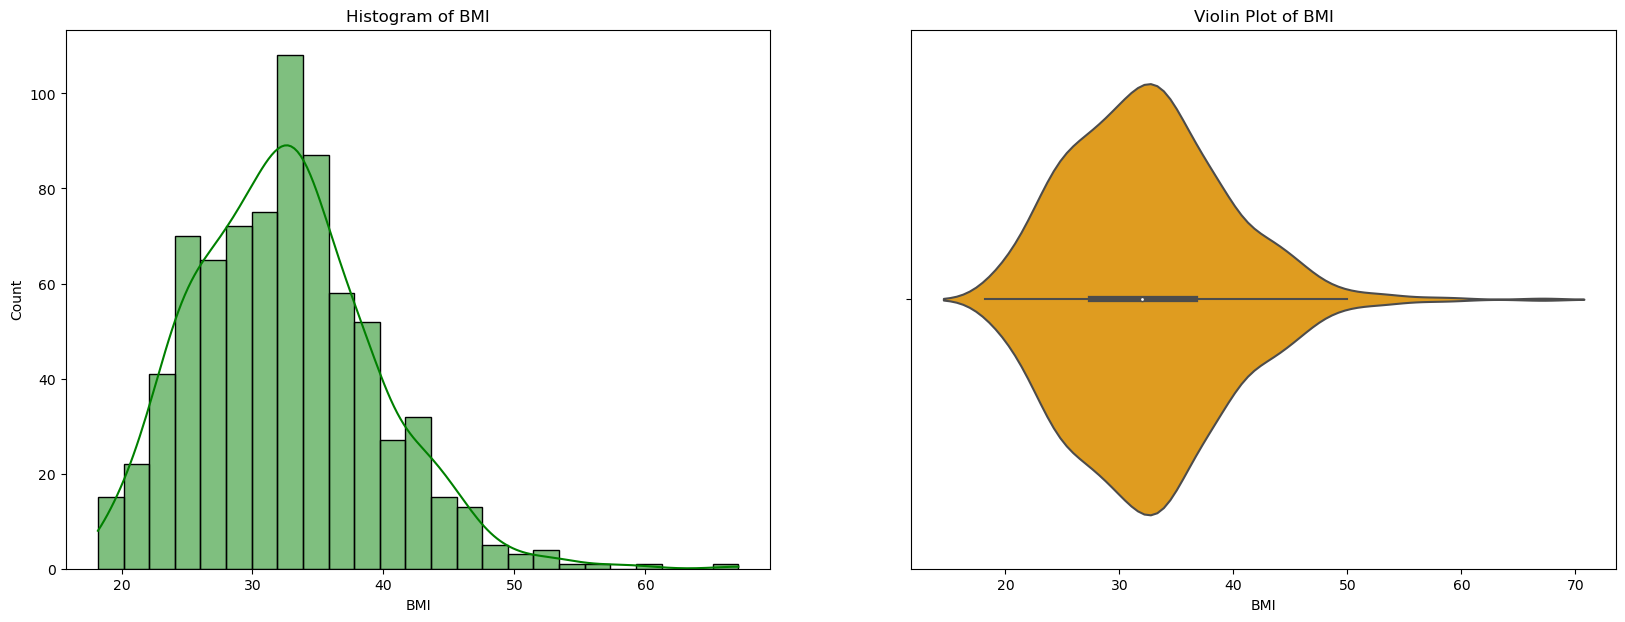

In [33]:
#Analysis of BMI
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df_cp, x="BMI", kde=True, ax=ax1[0], color='green')
ax1[0].set_title('Histogram of BMI')
sns.violinplot(data=df_cp, x="BMI", ax=ax1[1], color='orange')
ax1[1].set_title('Violin Plot of BMI')
plt.show()

In [34]:
print("Median of BMI: ",df_cp['BMI'].median())
print("Maximum of BMI: ",df_cp['BMI'].max())
print("Mean of BMI: ",df_cp['BMI'].mean())

Median of BMI:  32.0
Maximum of BMI:  67.1
Mean of BMI:  32.45091145833333


In [35]:
print("Rows with BMI value of 0: ",df_cp[df_cp["BMI"]==0].shape[0])

Rows with BMI value of 0:  0


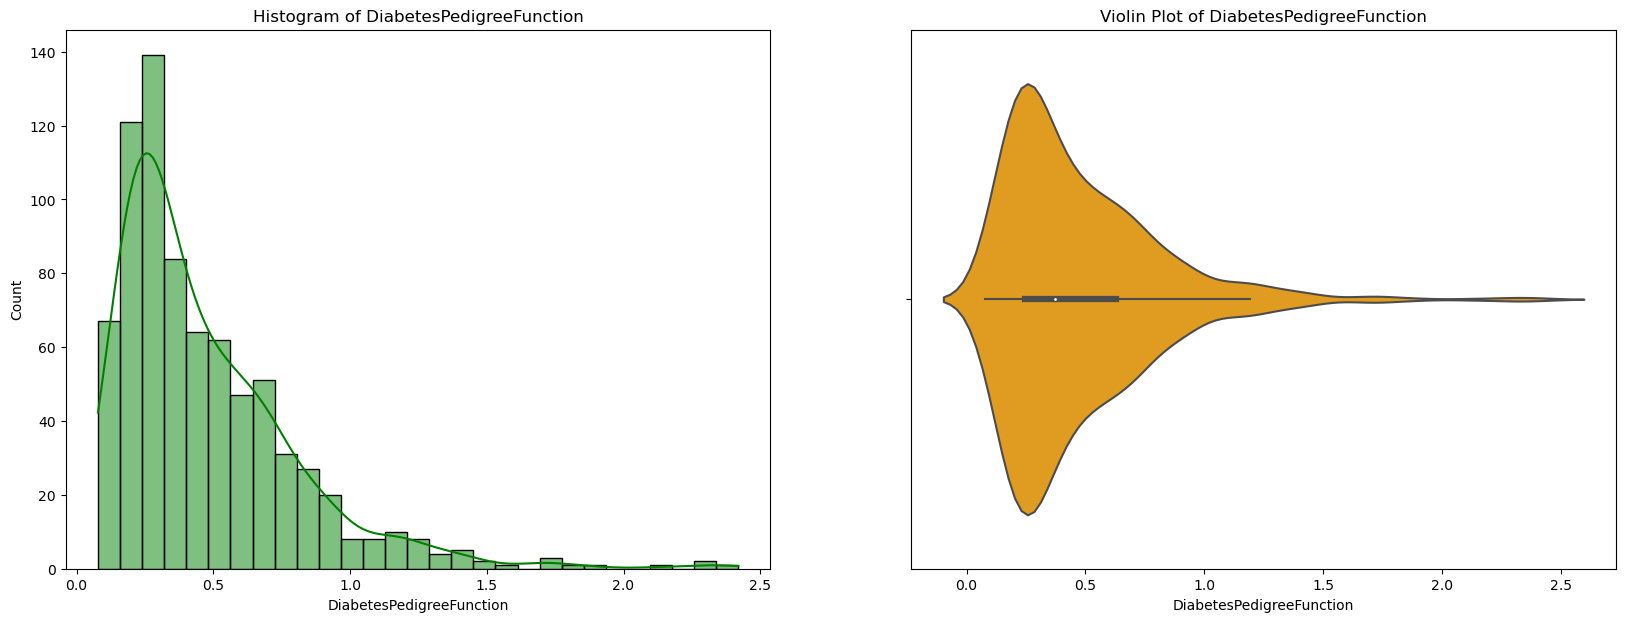

In [36]:
#Analysis of Diabetes pedigree Function
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df_cp, x="DiabetesPedigreeFunction", kde=True, ax=ax1[0], color='green')
ax1[0].set_title('Histogram of DiabetesPedigreeFunction')
sns.violinplot(data=df_cp, x="DiabetesPedigreeFunction", ax=ax1[1], color='orange')
ax1[1].set_title('Violin Plot of DiabetesPedigreeFunction')
plt.show()

In [37]:
print("Median of DiabetesPedigreeFunction: ",df_cp['DiabetesPedigreeFunction'].median())
print("Maximum of DiabetesPedigreeFunction: ",df_cp['DiabetesPedigreeFunction'].max())
print("Mean of DiabetesPedigreeFunction: ",df_cp['DiabetesPedigreeFunction'].mean())

Median of DiabetesPedigreeFunction:  0.3725
Maximum of DiabetesPedigreeFunction:  2.42
Mean of DiabetesPedigreeFunction:  0.47187630208333325


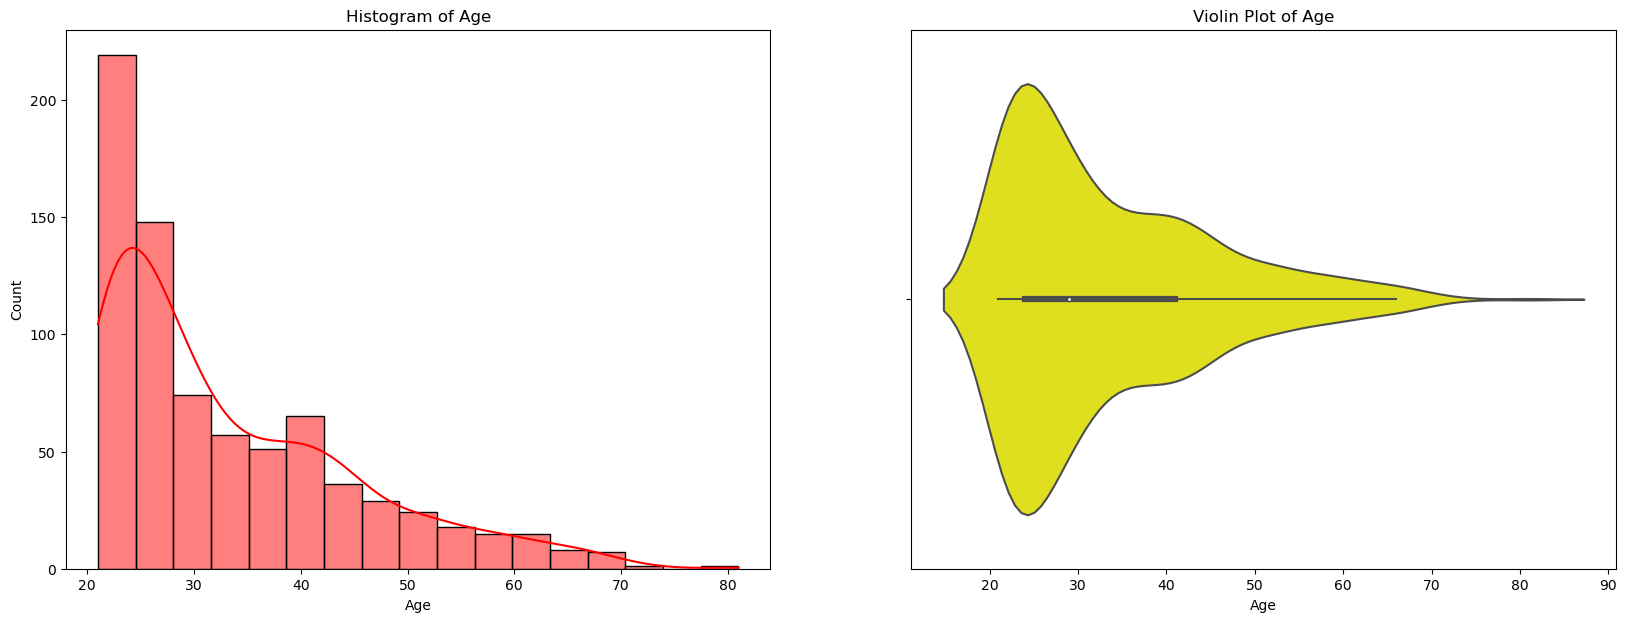

In [38]:
#Analysis of Age
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df_cp, x="Age", kde=True, ax=ax1[0], color='red')
ax1[0].set_title('Histogram of Age')
sns.violinplot(data=df_cp, x="Age", ax=ax1[1], color='yellow')
ax1[1].set_title('Violin Plot of Age')
plt.show()

In [39]:
print("Median of Age: ",df_cp['Age'].median())
print("Maximum of Age: ",df_cp['Age'].max())
print("Mean of Age: ",df_cp['Age'].mean())

Median of Age:  29.0
Maximum of Age:  81
Mean of Age:  33.240885416666664


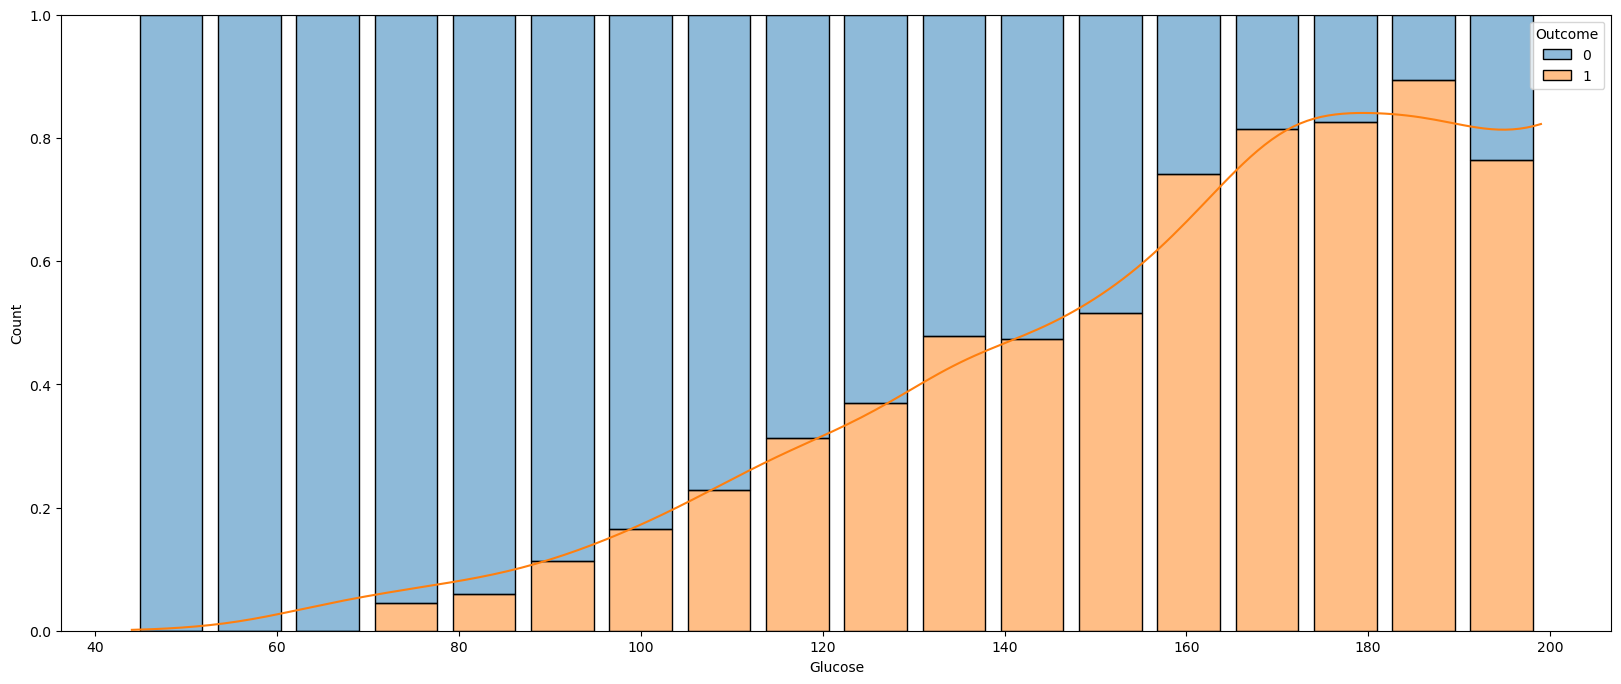

In [40]:
#Analysis of Glucose and Outcome
fig15, ax15 = plt.subplots(figsize=(20, 8))
sns.histplot(data=df_cp, x="Glucose", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax15)
plt.show()

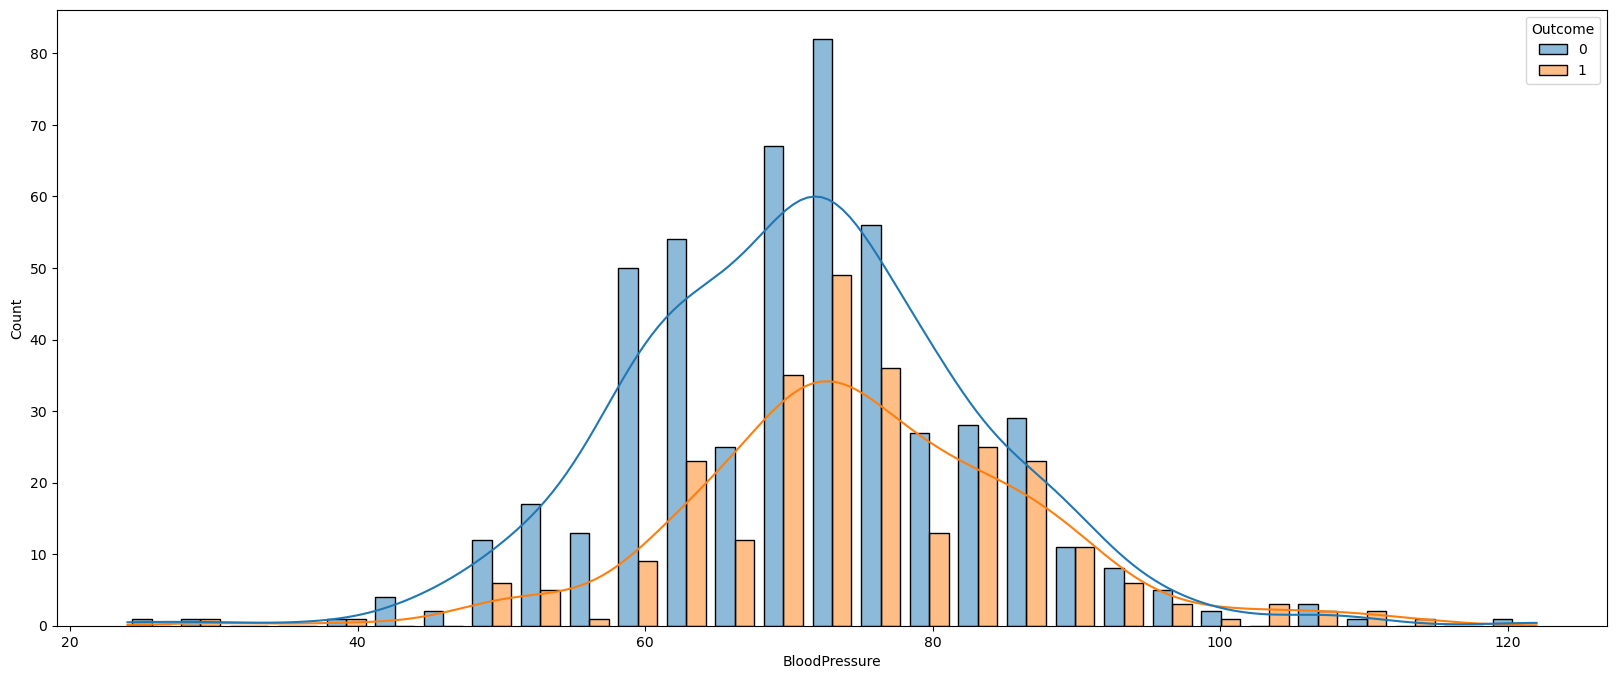

In [41]:
#Analysis of BloodPressure and Outcome
fig16, ax16 = plt.subplots(figsize=(20, 8))
sns.histplot(data=df_cp, x="BloodPressure", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax16)
plt.show()

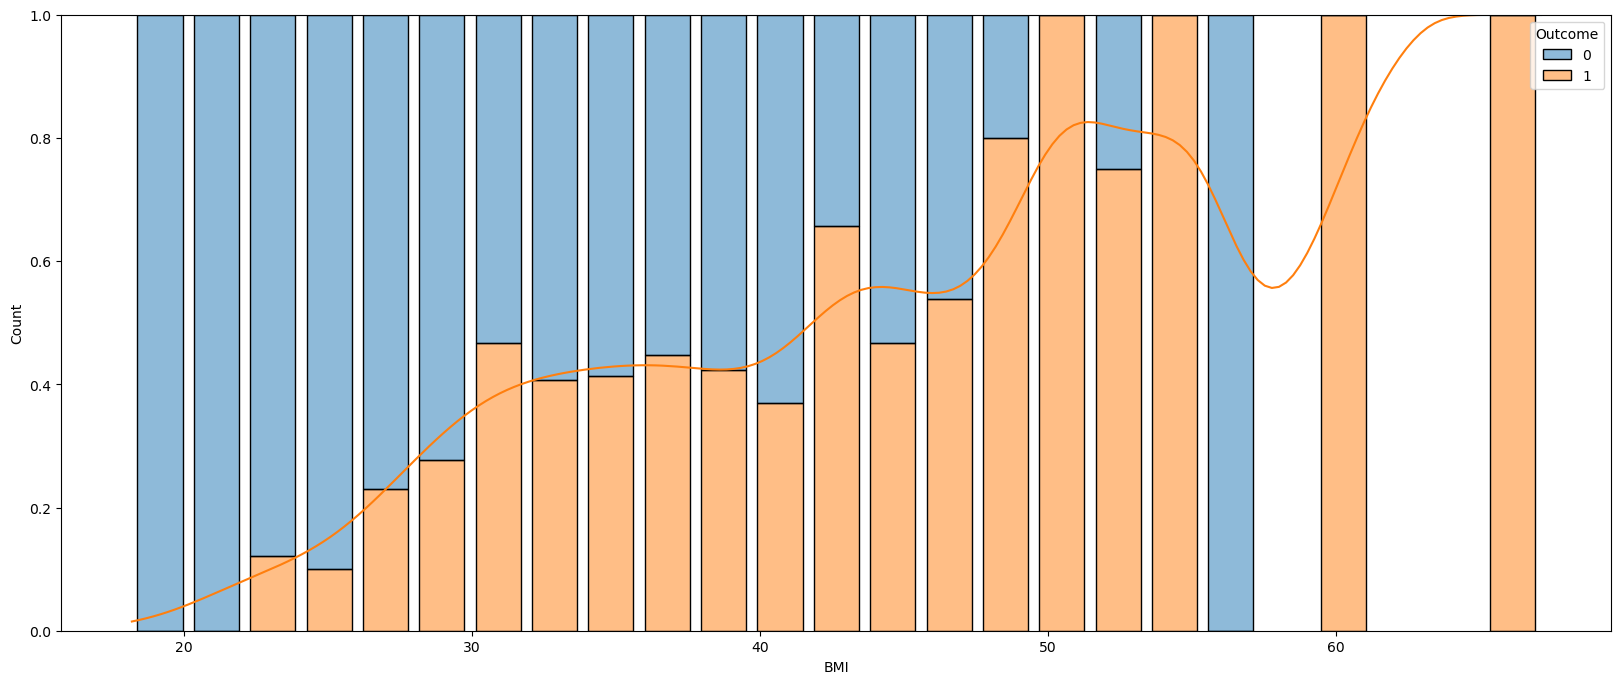

In [42]:
#Analysis of BMI and Outcome
fig17, ax17 = plt.subplots(figsize=(20, 8))
sns.histplot(data=df_cp, x="BMI", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax17)
plt.show()

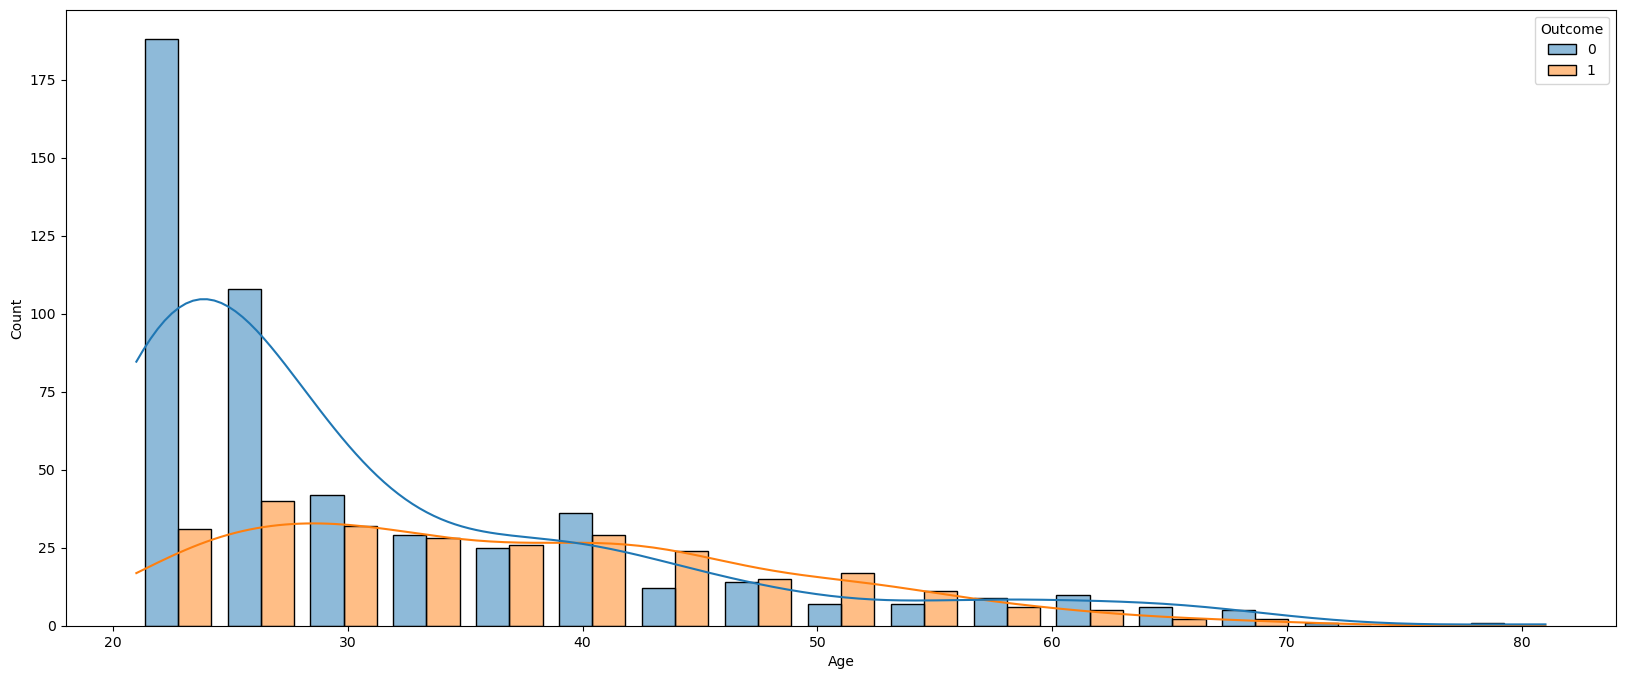

In [44]:
#Analysis of Age and Outcome
fig18, ax18 = plt.subplots(figsize=(20, 8))
sns.histplot(data=df_cp, x="Age", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax18)
plt.show()

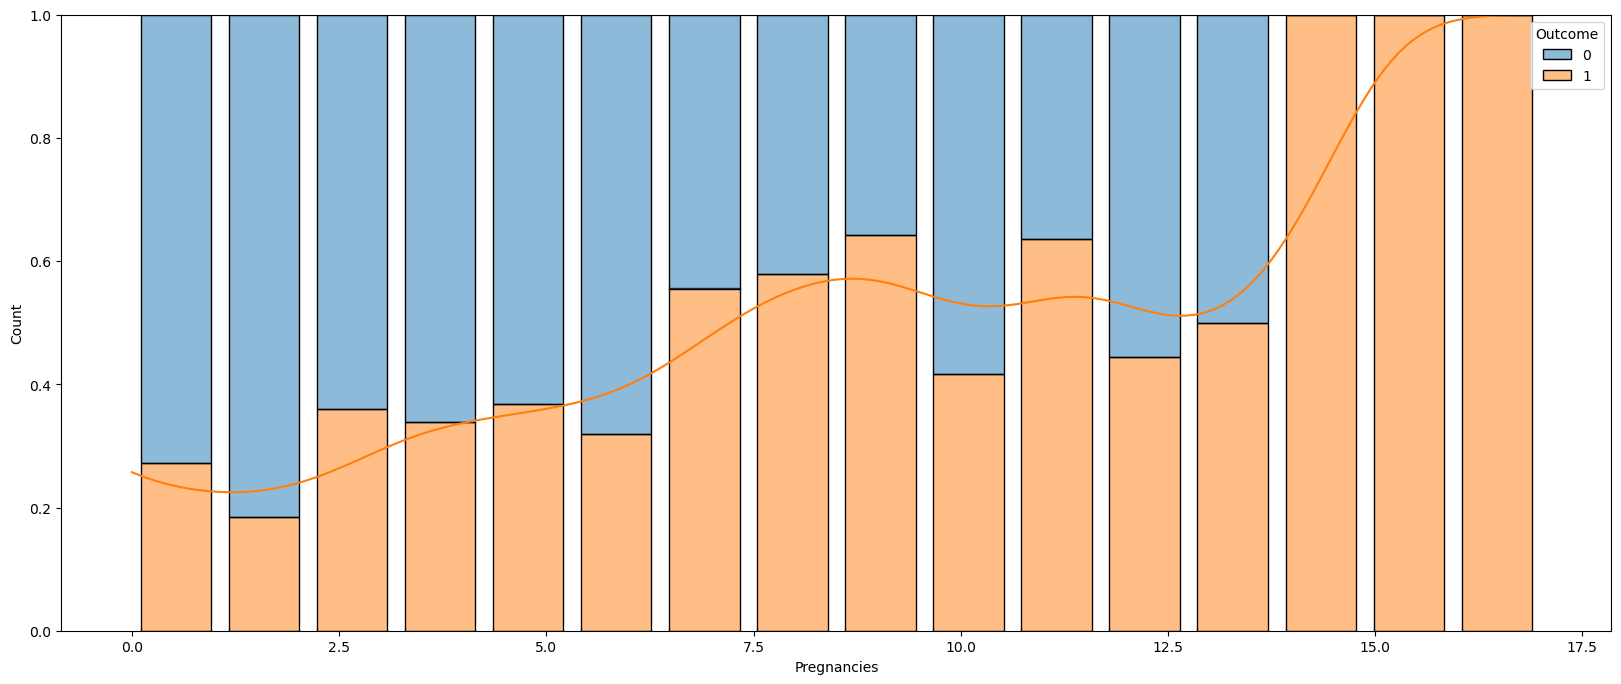

In [46]:
#Analysis of Pregnancies and Outcome
fig19, ax19 = plt.subplots(figsize=(20, 8))
sns.histplot(data=df_cp, x="Pregnancies", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax19)
plt.show()

In [2]:
#Analyzing Correlations
# 2D Correlations matrix
corr_matrix = df_cp.corr()

NameError: name 'df_cp' is not defined